In [6]:
# Code used for Analysis
import pandas as pd
import matplotlib.pyplot as plt
%store -r cg

In [9]:
cg = cg # Defining cg 

In [10]:
cg.head()

,game_order,event,site,white_title,white_rating_diff,white_elo,white,result,black,black_elo,black_rating_diff,black_title,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,magnus_result
0,105,Lichess Titled Arena,https://lichess.org/KEvLWfdH,GM,58.0,2500,Magnus Carlsen,1-0,jsalomon,2532,-13.0,GM,-32,E47,Normal,60+0,2017.12.14,21:00:02,Standard,lost
1,104,Lichess Titled Arena,https://lichess.org/9YoOXtxp,IM,17.0,2420,Yoseph Taher,1-0,Magnus Carlsen,2558,-65.0,GM,-138,B01,Time forfeit,60+0,2017.12.14,21:01:10,Standard,lost
2,103,Lichess Titled Arena,https://lichess.org/yh0IxjPf,FM,-17.0,2754,gnejs,0-1,Magnus Carlsen,2493,73.0,GM,-261,B01,Normal,60+0,2017.12.14,21:04:13,Standard,lost
3,102,Lichess Titled Arena,https://lichess.org/qcHWzltq,GM,61.0,2566,Magnus Carlsen,1-0,Toivo Keinänen,2755,-16.0,IM,-189,A01,Normal,60+0,2017.12.14,21:06:30,Standard,lost
4,101,Lichess Titled Arena,https://lichess.org/HhV5RN5e,GM,9.0,2627,Magnus Carlsen,1-0,AusCub,2275,-4.0,NM,352,A01,Normal,60+0,2017.12.14,21:07:57,Standard,lost


In [70]:
# The next few code blocks is an attempt to keep track of Magnus' elo. This also helps when keeping track of his oppponents' elo as well
magnuswhiteelo = cg.loc[(cg.white=='Magnus Carlsen'),['white_elo']]
magnuswhiteelo.reset_index(inplace=True)
magnuswhiteelo

,index,white_elo
0,0,2500
1,3,2566
2,4,2627
3,6,2675
4,9,2652
...,...,...
6737,13433,3191
6738,13435,3196
6739,13437,3202
6740,13439,3207


In [71]:
magnusblackelo = cg.loc[(cg.black=='Magnus Carlsen'),['black_elo']]
magnusblackelo.reset_index(inplace=True)
magnusblackelo

,index,black_elo
0,1,2558
1,2,2493
2,5,2636
3,7,2695
4,8,2702
...,...,...
6695,13432,3188
6696,13434,3193
6697,13436,3199
6698,13438,3204


In [93]:
def mergeelo(row):
    return row.white_elo + row.black_elo

In [90]:
magnuselo = magnuswhiteelo.merge(magnusblackelo,how='outer',on='index',sort=True)
magnuselo = magnuselo.fillna(0)
magnuselo

,index,white_elo,black_elo
0,0,2500.0,0.0
1,1,0.0,2558.0
2,2,0.0,2493.0
3,3,2566.0,0.0
4,4,2627.0,0.0
...,...,...,...
13437,13437,3202.0,0.0
13438,13438,0.0,3204.0
13439,13439,3207.0,0.0
13440,13440,0.0,3209.0


In [95]:
magnuselo['elo']= magnuselo.apply(lambda row: mergeelo(row),axis=1)
magnuselo

,index,white_elo,black_elo,elo
0,0,2500.0,0.0,2500.0
1,1,0.0,2558.0,2558.0
2,2,0.0,2493.0,2493.0
3,3,2566.0,0.0,2566.0
4,4,2627.0,0.0,2627.0
...,...,...,...,...
13437,13437,3202.0,0.0,3202.0
13438,13438,0.0,3204.0,3204.0
13439,13439,3207.0,0.0,3207.0
13440,13440,0.0,3209.0,3209.0


In [114]:
opponentwhiteelo = cg.loc[(cg.white!='Magnus Carlsen'),['white_elo']]
opponentwhiteelo.reset_index(inplace=True)
opponentblackelo = cg.loc[(cg.black!='Magnus Carlsen'),['black_elo']]
opponentblackelo.reset_index(inplace=True)
opponentelo = opponentwhiteelo.merge(opponentblackelo,how='outer',on='index',sort=True)
opponentelo = opponentelo.fillna(0)
opponentelo['elo']= opponentelo.apply(lambda row: mergeelo(row),axis=1)
opponentelo

,index,white_elo,black_elo,elo
0,0,0.0,2532.0,2532.0
1,1,2420.0,0.0,2420.0
2,2,2754.0,0.0,2754.0
3,3,0.0,2755.0,2755.0
4,4,0.0,2275.0,2275.0
...,...,...,...,...
13437,13437,0.0,2984.0,2984.0
13438,13438,2982.0,0.0,2982.0
13439,13439,0.0,2979.0,2979.0
13440,13440,2977.0,0.0,2977.0


In [121]:
max(opponentelo.elo)

3269.0

In [126]:
[x for x in range(2000,3301,100)]

[2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300]

(array([  75.,  121.,  194.,  198.,  257.,  370.,  622., 1612., 2202.,
        2488., 3201., 1518.,  280.]),
 array([2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000,
        3100, 3200, 3300]),
 <BarContainer object of 13 artists>)

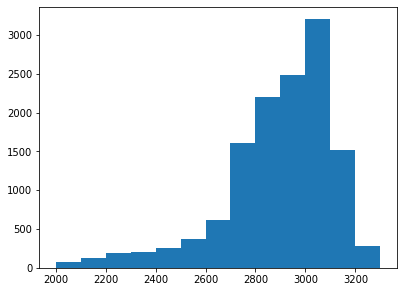

In [128]:
plt.hist(opponentelo.elo,bins=[x for x in range(2000,3301,100)])

(array([2141., 1612., 2202., 2488., 3201., 1798.]),
 array([   0, 2700, 2800, 2900, 3000, 3100, 3300]),
 <BarContainer object of 6 artists>)

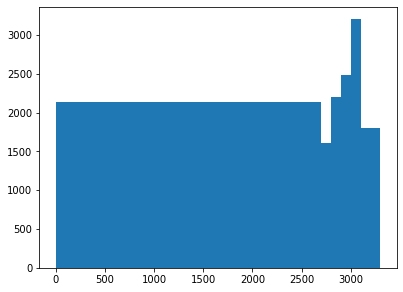

In [130]:
plt.hist(opponentelo.elo,bins=[0,2700,2800,2900,3000,3100,3300])

<BarContainer object of 6 artists>

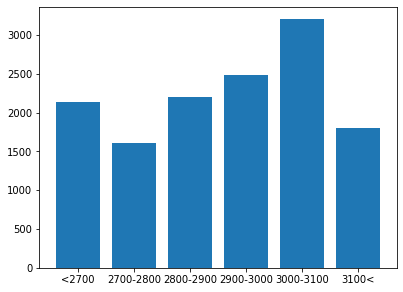

In [131]:
x = ['<2700','2700-2800','2800-2900','2900-3000','3000-3100','3100<']
y = [2141, 1612, 2202, 2488, 3201, 1798]
plt.bar(x,y)

In [135]:
oppres = pd.DataFrame(data=(opponentelo.elo,cg.magnus_result)).T
oppres

,elo,magnus_result
0,2532.0,lost
1,2420.0,lost
2,2754.0,lost
3,2755.0,lost
4,2275.0,lost
...,...,...
13437,2984.0,won
13438,2982.0,won
13439,2979.0,won
13440,2977.0,won


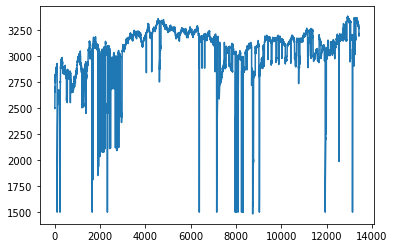

In [96]:
plt.plot(magnuselo.index,magnuselo.elo)
# new accounts start at 1500

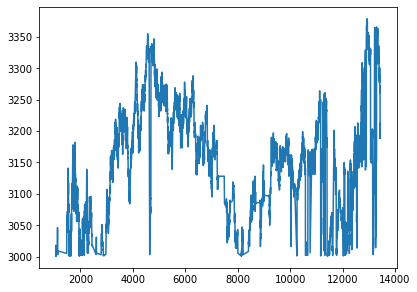

In [117]:
plt.plot(magnuselo.index[magnuselo.elo>3000],magnuselo.elo[magnuselo.elo>3000])
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.show()
# The rating abruptly changes when Magnus's account or time control changes.
# It's hard to tell when Magnus is climbing to a certain rating from a new account vs when his rating represents his actual strength
# Either way, this plot is not useful since it's not continuous and it's near impossible to figure out which points to connect, if any.

In [ ]:
cg.magnus_result.value_counts()

In [24]:
# Converts a number of wins, losses, and ties to a win percentage
def winpercentage(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

In [27]:
print('Overall win percentage: ',winpercentage(cg.magnus_result.value_counts()))
print('Black win percentage: ',winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts()))
print('White win percentage: ',winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()))
# Significant 5% difference between black and white

Overall win percentage:  0.7188662401428358
Black win percentage:  0.6903731343283582
White win percentage:  0.7471818451498072


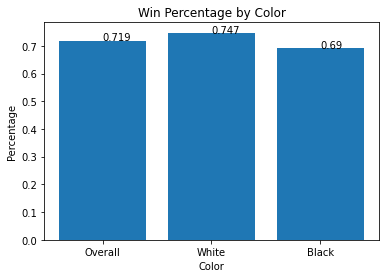

In [56]:
x = ['Overall','White','Black']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()),winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Color')
plt.xlabel('Color')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

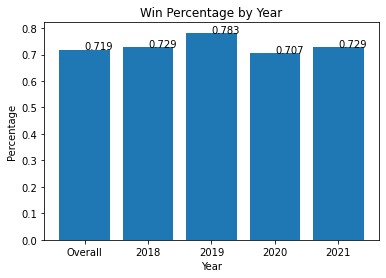

In [54]:
x = ['Overall','2018','2019','2020','2021']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2018'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2019'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2020'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2021'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

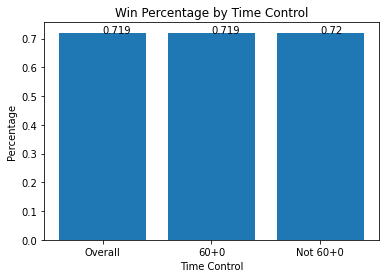

In [57]:
# 85% of games are 60+0, 6% of games are 180+0 and other time controls are even lower, will change or remove
x = ['Overall','60+0','Not 60+0']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.time_control=='60+0'].magnus_result.value_counts()),winpercentage(cg[cg.time_control!='60+0'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

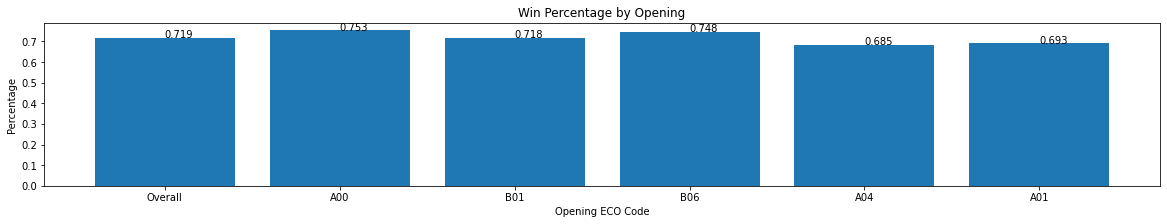

In [113]:
# I think first move might be better but this is a test
x = ['Overall','A00','B01','B06','A04','A01']
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.eco=='A00'].magnus_result.value_counts()),winpercentage(cg[cg.eco=='B01'].magnus_result.value_counts()),winpercentage(cg[cg.eco=='B06'].magnus_result.value_counts()),winpercentage(cg[cg.eco=='A04'].magnus_result.value_counts()),winpercentage(cg[cg.eco=='A01'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Opening')
plt.xlabel('Opening ECO Code')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

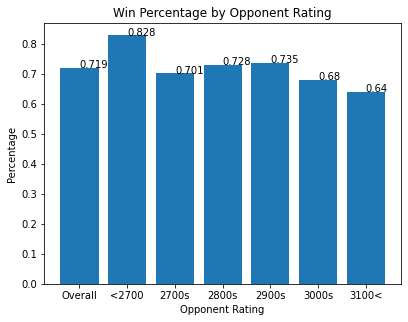

In [141]:
# x = ['<2700','2700-2800','2800-2900','2900-3000','3000-3100','3100<']
# y = [2141, 1612, 2202, 2488, 3201, 1798]
# uses oppres.elo and oppres.magnus_result
x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] # Less characters
y = [winpercentage(cg.magnus_result.value_counts()),winpercentage(oppres[oppres.elo<2700].magnus_result.value_counts()),winpercentage(oppres[(oppres.elo<2800) &(oppres.elo>=2700)].magnus_result.value_counts()),winpercentage(oppres[(oppres.elo<2900) &(oppres.elo>=2800)].magnus_result.value_counts()),winpercentage(oppres[(oppres.elo<3000) &(oppres.elo>=2900)].magnus_result.value_counts()),winpercentage(oppres[(oppres.elo<3100) &(oppres.elo>=3000)].magnus_result.value_counts()),winpercentage(oppres[(oppres.elo>=3100)].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Win Percentage by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

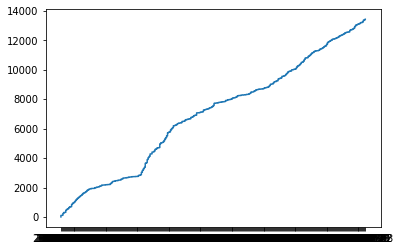

In [12]:
plt.plot(cg.utc_date,cg.index)